# Modelagem matemática e simulação numérica do resfriamento rápido de morangos com o ar forçado

In [2]:
using LsqFit
using Plots
using DifferentialEquations
using Random

* O trabalho de DANIELA C. Z. PIROZZI e MARIÂNGELA AMENDOLA abordou o resfriamento rápido de morangos com ar forçado via simulação numérica.




## Introdução

O resfriamento rápido de alimentos *in natura*, logo após a sua colheita, se faz cada vez mais necessário conforme a demanda por determinados produtos perecíveis aumenta em todo o mundo. Com isso também surge a necessidade de entender esse processo de resfriamento, a fim de torná-lo cada vez mais eficiente. Tal entendimento pode ser obtido a partir de meios experimentais e/ou numéricos, em conjunto com processos de análise teórica.

Como motivação, vamos considerar o resfriamento rápido de morangos através de ar forçado. A análilse feita aqui é inspirada no artigo de DANIELA C. Z. PIROZZI e MARIÂNGELA AMENDOLA, com os dados obtidos pelas autor

No artigo em questão, foram utilizados dados de um experimento real para a validação da simulação numérica. Ou seja, foram necessários medições experimentais de temperatura e o conhecimento de parâmetros físicos. Dentre esses, um é limitante e sensivel a todos os outros, o coeficiente de transferência de calor por convenção, denotado por $h$.

**Objetivo:** Simular o resfriamento dos morangos e obter uma estimativa para $h$. 

## Dados e métodos utilizados:


* Para simular numericamente este processo vamos utilizar o mesmo modelo matemático escolhido no artigo, com base na lei da difusão térmica de Fourier. 

$$ \frac{\partial T}{\partial t}(r,t) = \alpha(\frac{2}{r}\frac{\partial T}{\partial r}(r,t)+\frac{\partial^2 T}{\partial r^2}(r,t))$$ $t>0, r \in [0,R]$

* $T(r,t) = $ temperatura no interior do morango ao longo do tempo, $C°$.
* $t = $ tempo, $s$.
* $r = $ distância até o centro do morango, $m$.
* $\alpha = $ difusividade térmica do morango, $m^2s^{-1}$.
* $K_p = $ condutividade térmica do morango, $W\deg m^{-1}°C^{-1}$.
* $C_p = $ calor específico do morango, $JKg^{-1}°C{-1}$
* $\rho = $ densidade do morango, $Kgm^{-3}$.
* $R = $ raio do morango, $m$.

Como condição inicial, temos que: $$T(r,0) = T_0,  r \in \mathbb{R} $$

As condições de contorno são: $$\frac{\partial T}{\partial r}(0,t) = 0; t \geq 0$$


$$-K_p\frac{\partial T}{\partial r}(R,t) = h[T_s(t)-T_a(t)]; t \geq 0$$


* $h=$ coeficiente de transferência de calor por convenção, $Wm^{-2}°C^{-1}$.
* $T_s(t)=$ temperatura na superfície do morango, $C°$.
* $T_a(t)=$ temperatura na câmera de resfriamento, $C°$.

Para o calculo dos resíduos, vamos utilizar a seguinte norma: $$|T_{exp} - T_{num}| = \sqrt{\sum_{i=1}^{n} (T_{exp}-T_{num})^2} $$

* $T_{exp}=$ temperatura no centro do morango, obtida experimentalmente, $°C$.
* $T_{num}=$ temperatura no centro do morango, obtida numericamente, $°C$.
* $n=$ número total de medidas.
* $t=$ tempo, $s$.

$K_p = 0,54 Wm^{-1}°C^{-1}$

$\alpha = 1,72.10^{-7}m^2s^{-1}$

$R = 0,025m$


O método numérico utizado para resolver a equação é o método explícito das diferenças finitas. Para isso temos que discretizar nossa equação. 

 O primeiro passo é criar uma partição com n pontos dos intervalos $(0,R)$ $e$ $(0,T_{final})$

 Daí definimos nosso $T$ discretizado como: $T_i^n = T(i\Delta r,n\Delta t)$   ;    para   $i = [1,nx], n = [1,nt]$
 
 * $i$ é a posição dos pontos de resolução na direção radial.
 
 * $nx$ último ponto na direção radial.
 * $n$ numéros de passoa na direção do tempo.
 * $nt$ último passo na direção do tempo.
 * $\Delta r$ distância entre os pontos de resolução na direção radial.
 * $\Delta t$ distância entre os pontos de resolução na direção do tempo.
 
 Podemos aproximar a derivada parcial de T em relação ao tempo, com erro local $\Delta t$:
$$ \frac{\partial T}{\partial t}(r,t) \approx \frac{T(r,t+\Delta t) - T(r,t)}{\Delta t}$$

Fazendo o mesmo para a derivada em relação ao eixo radial, com erro local $\Delta r$, também temos que:

$$ \frac{\partial T}{\partial r}(r,t) \approx \frac{T(r+\Delta r,t) - T(r,t)}{\Delta r}$$

A ideia do método das diferenças finitas aqui é usar a série de Taylor para ter uma aproximação da segunda derivada de $T(r,t)$ em relação ao raio da seguinte forma:

Sabemos que a série de Taylor de uma função $f$ no ponto $x+h$ é dada por: $$f(x+h) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x)h^n}{n!} $$

Como vamos derivar em relação ao raio, tomamos $T(r,t) = T(r)$ para facilitar as contas:

$$T(r+\Delta r) = T(r) +  \frac{\partial T}{\partial r}(r)\Delta r +  \frac{\partial ^2 T}{ \partial r^2}(r)\frac{\Delta t}{2} ^2 $$

$$T(r-\Delta r) = T(r) -  \frac{\partial T}{\partial r}(r)\Delta r + \frac{\partial ^2 T}{ \partial r^2}(r)\frac{\Delta r}{2} ^2 $$

Com erro da ordem $\Delta r ^2$. Somando as equações, ficamos com:

$$ T(r+\Delta r) + T(r - \Delta r) = 2T(r) + \frac{\partial ^2 T}{ \partial r^2}(r)\Delta r ^2 $$

$$ \frac{\partial ^2 T}{ \partial r^2}(r) = \frac{T(r+\Delta r) + T(r - \Delta r) - 2T(r)}{\Delta r^2}$$

Com erro da ordem $\Delta r^2$, ficamos com a equação discretizada da forma:

$$ \frac{\partial ^2 T_i}{ \partial r^2} = \frac{T_{i+1} + T_{i-1} - 2T_i}{\Delta r^2}$$

E também obtemos acima que: 

$$ \frac{\partial  T_i}{ \partial r} = \frac{T_{i+1} - T_i}{\Delta r}$$

$$ \frac{\partial  T^n}{ \partial t} = \frac{T^{n+1} - T^n}{\Delta t}$$

Com seus respectivos erros locais. Agora que já discretizamos todas as derivadas envolvidas na fórmula do nosso modelo, podemos discretizá-lo:


Denotando, $F = \alpha \frac{\Delta t}{\Delta r^2}$, obtemos a equação inicial discretizada, da forma:


$$ T_i^{n+1} = FT_{i-1} + (1-2F - \frac{2F}{i})T_i^n + (F+\frac{2F}{i})T_{i+1}^n$$


Discretizando a condição inicial, ficamos com:

$T_i^1 = T_1$     $\forall i \geq 1$


Discretizando as condições de contorno, temos: 


$\frac{T_{i+1}^n - T_i^n}{\Delta r} = 0$      $\forall n \geq 1$  e  $ i = 1$

ou,


$T_2^n = T_1^n$      $ \forall n \geq 1$



Analogamente, quando $ i = nx$, temos:

$\frac{T_{nx}^n - T_{nx - 1}^n}{\Delta r}= \frac{-h}{kp}[ T_{nx}^n - T_a]$


$ T_{nx}^n = \frac{T_{nx-1}^n + \frac{h}{kp} \Delta r T_a}{1 + \frac{h}{kp}\Delta r}$

## Via equações diferenciais

* A parte mais delicada na resolução via equações diferenciais ([Method of Lines](https://en.wikipedia.org/wiki/Method_of_lines)) são as condições de contorno.

* Para manter o método de segunda ordem no espaço, ao invés da aproximação de diferenças finitas pra frente feita acima, que é de primeira ordem, vamos usar aproximações de segunda ordem.

### No interior

* No interior, podemos usar diferenças centradas:
$$ \frac{\partial T_i}{\partial r} \approx \frac{T_{i+1} - T_{i-1}}{2\Delta r}, \quad i=2, \ldots, nr-1.
$$

* Assim, como $r = i\Delta r$ nos ponto da malha, obtemos
$$ \frac{2}{r}\frac{\partial T_i}{\partial r} \approx \frac{1}{i}\frac{T_{i+1} - T_{i-1}}{\Delta r^2}, \quad i=2, \ldots, nr-1
$$

* Para a segunda derivada, fazemos o clássico
$$ \frac{\partial^2 T_i}{\partial r^2} \approx \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta r^2}, \quad i=2, \ldots, nr-1.
$$

### Condição de contorno no centro do morango

* Na condição de contorno em $r=0$, associada ao índice $i$, vamos usar **diferenças para frente de segunda ordem**:
$$ \frac{\partial T_i}{\partial r} \approx \frac{-T_{i+2} + 4T_{i+1} - 3T_i}{2h}, \quad i=1.
$$

* Como queremos que $\partial_r T(r)|_{r=0} = 0$, então
$$ T_1 = \frac{4T_2 - T_3}{3}.
$$

### Condição de contorno na superfície

* Na superfície $r=R$, temos a condição de radiação
$$ -k_p \frac{\partial T(R)}{\partial r} = h (T(R) - T_a).
$$

* Agora, usamos **diferenças para trás de segunda ordem**:
$$ \frac{\partial T_i}{\partial r} \approx \frac{3T_i - 4T_{i-1} + T_{i-2}}{2\Delta r}, \quad i=nr.
$$

* Juntando, 
$$  -k_p \frac{3T_{nr} - 4T_{nr-1} + T_{nr-2}}{2\Delta r} = h (T_{nr} - T_a).
$$

* Isso nos dá
$$  -k_p (3T_{nr} - 4T_{nr-1} + T_{nr-2}) = 2h\Delta r (T_{nr} - T_a).
$$

* Resolvendo para $T_{nr}$,
$$  (2h\Delta r + 3k_p)T_{nr} = 4k_p T_{nr-1} - k_p T_{nr-2} + 2h\Delta r T_a.
$$

* Logo,
$$  T_{nr} = \frac{k_p (4T_{nr-1} - T_{nr-2}) + 2h\Delta r T_a}{2h\Delta r + 3k_p}.
$$

In [3]:
function resfriamento!(dTdt, T, p, t)
    α, h, kp, Ta, Δr = p 
    nr = length(T)
    T[1] = (4T[2] - T[3])/3
    T[nr] = (kp * (4T[nr-1] - T[nr-2]) + 2h * Δr * Ta)/(2h*Δr + 3kp)
    for i = 2:nr-1
        dTdt[i] = α * ((T[i+1] - T[i-1])/(i-1) + (T[i+1] - 2T[i] + T[i-1]))/Δr^2
    end
    # we don't bother to set dTdt[1] and dTdt[nr] since the values of T[1] and T[nr] are
    # defined from T[2:nr-1] and p at every step
    return nothing
end

resfriamento! (generic function with 1 method)

In [4]:
Tinit = 14.0 # temperatura inicial (uniforme) do morango em Celsius
Ta = 0.0 # temperatura ambiente em Celsius
α = 1.72*10^(-7) # difusividade térmica
h = 11 #
kp = 0.54 # 𝑊 /(𝑚 °𝐶)
R = 0.025 # raio do morango 2,5cm
nr = 45 # número de pontos da malha (i=1 corresponde a r=0, i=nr a r=R, e r=(i-1)Δr em geral
Δr = R/(nr-1) # distância entre pontos consecutivos da malha - resolução da malha
t0 = 0.0 # segundos
tfinal = 85*60.0 # segundos
dtsave = 60.0 # salvar a cada (múltiplo de) segundo
r_range = range(0.0, R, length=nr)
t_range = t0:dtsave:tfinal # minutos
nothing

In [5]:
tspan = (t0, tfinal)
p = [α, h, kp, Ta, Δr]
T0 = Tinit*ones(nr)
prob = ODEProblem(resfriamento!, T0, tspan, p, saveat=dtsave)
nothing

In [6]:
#sol = solve(prob, AutoTsit5(Rosenbrock23()))
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: 1st order linear
t: 86-element Vector{Float64}:
    0.0
   60.0
  120.0
  180.0
  240.0
  300.0
  360.0
  420.0
  480.0
  540.0
  600.0
  660.0
  720.0
    ⋮
 4440.0
 4500.0
 4560.0
 4620.0
 4680.0
 4740.0
 4800.0
 4860.0
 4920.0
 4980.0
 5040.0
 5100.0
u: 86-element Vector{Vector{Float64}}:
 [14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0  …  14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
 [14.000258388419802, 13.99998190413072, 14.00001628894353, 13.999979662594187, 14.00001740318045, 13.9999745333803, 14.000017943415013, 13.99996466092086, 14.000014622235648, 13.999945368127161  …  13.775371372179098, 13.721151974147821, 13.658096743748448, 13.584248493696052, 13.499980508350845, 13.403830943139642, 13.296186053037903, 13.176306517783349, 13.044593779388004, 12.90456728241932]
 [14.003460427688323, 13.99670950126978, 13.999895624488746, 13.996405714646022, 13.999512721152568, 13.995739123844215, 13.998768413408671, 13.99458194

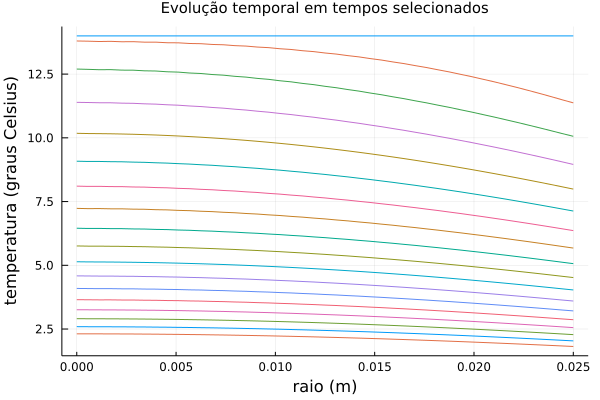

In [8]:
p = plot(title="Evolução temporal em tempos selecionados", titlefont=10,
    xaxis="raio (m)", yaxis="temperatura (graus Celsius)", legend=:false)
for j in 1:5:length(sol.u)
    plot!(p, r_range, sol.u[j])
end
display(p)

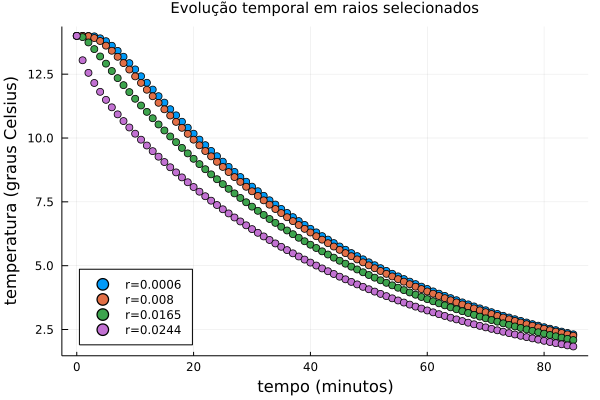

In [12]:
p = plot(title="Evolução temporal em raios selecionados", titlefont=10,
    xaxis="tempo (minutos)", yaxis="temperatura (graus Celsius)", legend=:bottomleft)
for i in (2, div(nr,3), 2*div(nr,3), nr-1)
    scatter!(p, t_range ./ 60, getindex.(sol.u, i), label="r=$(round((i-1)*Δr, digits=4))")
end
display(p)